# A3

In [1]:
# Standard imports
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import Network as Network
import copy

# Q1: Vanishing Gradient

## (a)

$$
\sigma(z) = \frac{1}{1+e^{-z}} \\
\sigma^{'}(z) = \frac{e^z}{(1+e^z)^2} \\
$$
Let
$$
t = e^z > 0 \\
$$
We have
$$
\sigma^{'}(z) = \frac{e^z}{(1+e^z)^2} = \frac{t}{(1+t)^2} = \frac{t}{t^2 + 2t + 1} = \frac{1}{t + 2 + \frac{1}{t}} \leq \frac{1}{4}
$$
Where we take the equal sign when t = 2, i.e. $z = ln2$  
So $|w\sigma^{'}(wh+b)| \leq |\frac{1}{4}w|$  
And we know $|w\sigma^{'}(wh+b)| \geq 1$ can only occur if $|w| \geq 4$



## (b)

Let 
$$
x = \sigma(z) = \sigma(wh+b)
$$
from part (a), we have 
$$
\sigma^{'}(z) = \frac{e^z}{(1+e^z)^2} = \sigma(z)(1 - \sigma(z)) = x(1-x)
$$
Suppose 
$$|w| \geq 4$$
Consider the set of input currents h for which 
$$|w\sigma^{'}(wh+b)| \geq 1$$
i.e.
$$ |\sigma^{'}(wh+b)| \geq \frac{1}{|w|}$$
i.e.
$$ |x(1-x)| \geq \frac{1}{|w|}$$
Solve for x for in the case when
$$ |x(1-x)| = \frac{1}{|w|}$$
We get
$$ 
x_{max} = \frac{1+\sqrt{1-\frac{4}{|w|}}}{2} \\
x_{min} = \frac{1-\sqrt{1-\frac{4}{|w|}}}{2}
$$ 
Since $x = \sigma(z) = \sigma(wh+b)$ is monotonically increasing w.r.t. z,  
$x = \sigma(z) = \sigma(wh+b)$ is monotonically increasing w.r.t. h if w > 0. i.e. for w > 0
$$
\sigma(wh_{max}+b) = \frac{1}{1 + e^{-(wh_{max}+b)}} = x_{max} = \frac{1+\sqrt{1 - \frac{4}{|w|}}}{2}\\
\sigma(wh_{min}+b) = \frac{1}{1 + e^{-(wh_{min}+b)}} = x_{min} = \frac{1-\sqrt{1 - \frac{4}{|w|}}}{2}
$$
$x = \sigma(z) = \sigma(wh+b)$ is monotonically decreasing w.r.t. h if w < 0. i.e. for w < 0
$$
\sigma(wh_{max}+b) = \frac{1}{1 + e^{-(wh_{max}+b)}} = x_{min} = \frac{1-\sqrt{1 - \frac{4}{|w|}}}{2}\\
\sigma(wh_{min}+b) = \frac{1}{1 + e^{-(wh_{min}+b)}} = x_{max} = \frac{1+\sqrt{1 - \frac{4}{|w|}}}{2}
$$
where $h_{max}$, $h_{min}$ are the corresponding end points of the interval satisfying the given constraint.  
Solve for $h_{max}$, $h_{min}$:  
(1)For w > 0:
$$
\begin{align}
h_{max} = -\frac{1}{w} ln\left[\frac{|w|}{2}\left(1-\sqrt{1-\frac{4}{|w|}}-\frac{2}{|w|}\right)\right]-\frac{b}{w} \\
h_{min} = -\frac{1}{w} ln\left[\frac{|w|}{2}\left(1+\sqrt{1-\frac{4}{|w|}}-\frac{2}{|w|}\right)\right]-\frac{b}{w} \\
\end{align}
$$
$$
\begin{align}
\Delta h = h_{max} - h_{min}
&= \frac{1}{w}ln\frac{\frac{|w|}{2}\left(1+\sqrt{1-\frac{4}{|w|}}-\frac{2}{|w|}\right)}{\frac{|w|}{2}\left(1-\sqrt{1-\frac{4}{|w|}}-\frac{2}{|w|}\right)}\\
&= \frac{1}{w}ln\frac{1-\frac{2}{|w|}+\sqrt{1-\frac{4}{|w|}}}{1-\frac{2}{|w|}-\sqrt{1-\frac{4}{|w|}}}\\
&= \frac{1}{w}ln\frac{{\left(1-\frac{2}{|w|}+\sqrt{1-\frac{4}{|w|}}\right)}^2}{\frac{4}{w^2}}\\
&= \frac{2}{w}ln\frac{\left(1-\frac{2}{|w|}+\sqrt{1-\frac{4}{|w|}}\right)}{\frac{2}{|w|}}\\
&= \frac{2}{w}ln\left[\frac{|w|}{2}\left(1+\sqrt{1-\frac{4}{|w|}}\right)-1\right]\\
&= \frac{2}{|w|}ln\left[\frac{|w|}{2}\left(1+\sqrt{1-\frac{4}{|w|}}\right)-1\right]\\
\end{align}
$$
(2)Similarly, For w < 0:
$$
\begin{align}
h_{max} = -\frac{1}{w} ln(\frac{|w|}{2}(1-\sqrt{1-\frac{4}{|w|}}-\frac{2}{|w|}))-\frac{b}{w} \\
h_{min} = -\frac{1}{w} ln(\frac{|w|}{2}(1+\sqrt{1-\frac{4}{|w|}}-\frac{2}{|w|}))-\frac{b}{w} \\
\end{align}
$$
$$
\begin{align}
\Delta h = h_{max} - h_{min}
&= -\frac{2}{w}ln\left[\frac{|w|}{2}\left(1+\sqrt{1-\frac{4}{|w|}}\right)-1\right]\\
&= \frac{2}{|w|}ln\left[\frac{|w|}{2}\left(1+\sqrt{1-\frac{4}{|w|}}\right)-1\right]\\
\end{align}
$$
Therefore, the set of activity values for h satisfying the given constraint can range over an interval no greater in the width than
$$
\frac{2}{|w|}ln\left[\frac{|w|}{2}\left(1+\sqrt{1-\frac{4}{|w|}}\right)-1\right]\\
$$

## (c) Plots

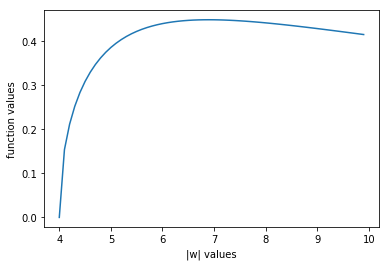

|w| = 6.9 yields the maximum value


In [2]:
# === YOUR CODE HERE ===
w_choices = np.arange(4.0, 10.0, 0.1)
w_to_f = {}
for w in w_choices:
    f = 2 / w * np.log(w / 2 * (1 + np.sqrt(1 - 4 / w)) - 1)
    w_to_f[w] = f
plt.figure()
plt.xlabel("|w| values")
plt.ylabel("function values")
f_values = [w_to_f[w] for w in w_choices]
plt.plot(w_choices, f_values)
plt.show()
best_index = np.argmax(np.array(f_values))
best_w = w_choices[best_index]
print("|w| = %.1f yields the maximum value" % best_w)

# Q2: Dropout

## Dataset

In [3]:
def GenerateDatasets(n):
    # 1D -> 1D (line mapping)
    n_input = 1
    n_output = 1
    noise = 0.5

    #np.random.seed(452)
    a = np.random.rand()/2.
    m = np.random.rand() + 0.5
    b = np.random.rand()-0.5

    def myfunc(x):
        return a*x**2 + m*x + b

    # Create a training dataset
    n_samples = n
    training_output = []
    training_input = []
    xv = np.linspace(-1, 1, n_samples)
    for idx in range(n_samples):
        #x = np.random.rand()*2. - 1.
        x = xv[idx]
        t = myfunc(x) + np.random.normal(scale=noise)
        training_input.append(np.array([x]))
        training_output.append(np.array([t]))

    # Create a testing dataset
    test_input = []
    test_output = []
    n_test_samples = 300
    xv = np.linspace(-1, 1, n_test_samples)
    for idx in range(n_test_samples):
        #x = np.random.rand()*2. - 1.
        x = xv[idx] #+ np.random.normal(scale=0.1)
        t = myfunc(x) + np.random.normal(scale=noise)
        test_input.append(np.array([x]))
        test_output.append(np.array([t]))


    train = [np.array(training_input), np.array(training_output)]
    test = [np.array(test_input), np.array(test_output)]
    
    return train, test

## Sample Code

In [4]:
# Here is an example, creating a Network object.
net = Network.Network(cost='cross-entropy')
net.AddLayer(Network.Layer(1))
net.AddLayer(Network.Layer(6, act='logistic'))
net.AddLayer(Network.Layer(1, act='logistic'))

In [5]:
# Generate the training and testing datasets
P = 5
train, test = GenerateDatasets(P)

In [6]:
# Train the network
progress = net.SGD(train[0], train[1], epochs=100, lrate=1.)

In [7]:
# Evaluate the cost 
print('Training cost = '+str(net.Evaluate(train[0], train[1])))
print('    Test cost = '+str(net.Evaluate(test[0], test[1])))

# These results won't necessarily make sense, since the network model
# might not be the right choice for the dataset.

Training cost = -1.2817604732179768
    Test cost = -0.6304182156523207


## 2 (a), (b), 3 (a) Completing the RobustNetwork Class

In [8]:
class RobustNetwork(Network.Network):
    
    def FeedForward(self, x, dropout=0):
        '''
            y = net.FeedForward(x, dropout=0)

            Runs the network forward, starting with x as input.
            However, a random subset of the hidden nodes are set to 0 activity.
            Returns the activity of the output layer.

            Inputs:
              x is a batch of inputs
              dropout is a probability that a node is dropped, in [0,1]
              
            Outputs:
              y is the batch of outputs (no dropout or the output layer)
        '''
        if dropout==0.:
            self.dropout_nonzero = False  # Internal flag for dropout
            super(RobustNetwork, self).FeedForward(x)
        else:
            self.dropout_nonzero = True   # Internal flag for dropout
            
            x = np.array(x)  # Convert input to array, in case it's not
            
            self.lyr[0].h = x # Set input layer
            
            self.mask = []  # mask will record which nodes were dropped
            self.mask.append(None)  # Input layer does not have dropout
            self.proportion = [] # proportion of actually activated nodes
            proportion = 1
            self.proportion.append(1.0)
            
            # Loop over connections except the last connection
            for pre,post,W in zip(self.lyr[:-2], self.lyr[1:-1], self.W):             
                # Calc. input current to next layer
                h = pre.h / proportion
                post.z = h @ W + post.b

                # Use activation function to get activities
                post.h = post.sigma(post.z)
                
                # Apply mask to get dropped activation
                prob = 1 - dropout
                mask = np.random.binomial(1, prob, post.h.shape)     
                post.h = post.h * mask
                self.mask.append(mask)
                
                # Write down the proportion for the next iteration
                proportion = np.mean(mask)
                self.proportion.append(proportion)
            
            # For the last output layer, no dropout is applied
            pre = self.lyr[-2]
            post = self.lyr[-1]
            W = self.W[-1]
            h = pre.h / proportion
            post.z = h @ W + post.b
            post.h = post.sigma(post.z)
            self.proportion.append(1.0)
                
        # Return activity of output layer
        return self.lyr[-1].h
    
    
    
    def BackProp(self, t, lrate=0.05, decay=0.):
        '''
            net.BackProp(targets, lrate=0.05)
            
            Given the current network state and targets t, updates the connection
            weights and biases using the backpropagation algorithm.
            
            Inputs:
             t      an array of targets (number of samples must match the
                    network's output)
             lrate  learning rate
             decay  is the coefficient for weight/bias decay
        '''
        t = np.array(t)  # convert t to an array, in case it's not
        
        # Error gradient for top layer
        dEdz = self.TopGradient(t)
        
        # Loop down through the layers
        for i in range(self.n_layers-2, -1, -1):
            pre = self.lyr[i]
            
            # Gradient w.r.t. weights
            dEdW = pre.h.T @ dEdz
            
            if self.dropout_nonzero:
                dEdW /= self.proportion[i]
                
            if decay != 0.:
                dEdW += decay * self.W[i]
                
            # Gradient w.r.t. biases
            dEdb = np.sum(dEdz, axis=0)
            
            if decay != 0.:
                dEdb += decay * self.lyr[i+1].b

            # Project error gradient down to layer below.
            if i>0:
                dEdz = ( dEdz @ self.W[i].T ) * pre.sigma_z_p(pre.z)
                if self.dropout_nonzero:
                    dEdz /= self.proportion[i]
            
            # Update weights and biases
            self.W[i] -= lrate*dEdW
            self.lyr[i+1].b -= lrate*dEdb
    
    
    def SGD(self, inputs, targets, lrate=0.05, epochs=1, batch_size=10, decay=0, dropout=0):
        '''
            progress = net.SGD(inputs, targets, lrate=0.05, epochs=1, decay=0, dropout=0)

            Performs Stochastic Gradient Descent on the network.
            Run through the dataset in batches 'epochs' number of times, incrementing the
            network weights after each batch. For each epoch, it
            shuffles the dataset.

            Inputs:
              inputs  is an array of input samples
              targets is a corresponding array of targets
              lrate   is the learning rate (try 0.001 to 5)
              epochs  is the number of times to go through the training data
              decay   is the decay coefficient for the weights and biases
              dropout is the dropout probability
              
            Outputs:
              progress is an (expochs)x2 array with epoch in the first column, and 
                      cost in the second column
        '''
        loss_history = []
        for k in range(epochs):
            batches = Network.MakeBatches(inputs, targets, batch_size=batch_size, shuffle=True)
            for mini_batch in batches:
                self.FeedForward(mini_batch[0], dropout=dropout)
                self.BackProp(mini_batch[1], decay=decay)

            loss_history.append([k, self.Evaluate(inputs, targets)])

        return np.array(loss_history)


## (c) Create the Network

In [9]:
# === YOUR CODE HERE ===
original_net = RobustNetwork(cost='MSE')
input_layer = Network.Layer(n_nodes=1, act='None')
hidden_layer = Network.Layer(n_nodes=10, act='arctan')
output_layer = Network.Layer(n_nodes=1, act='identity')
original_net.AddLayer(input_layer)
original_net.AddLayer(hidden_layer)
original_net.AddLayer(output_layer)

dropout_net = copy.deepcopy(original_net)

## (d) Train and Evaluate without dropout

In [10]:
# === YOUR CODE HERE ===
train, test = GenerateDatasets(5)
original_net.SGD(train[0], train[1], lrate=1., epochs=5000, batch_size=5)
print('Training cost = '+str(original_net.Evaluate(train[0], train[1])))
print('    Test cost = '+str(original_net.Evaluate(test[0], test[1])))

Training cost = 0.000518896431477866
    Test cost = 0.4005107611455607


## (e) Train and Evaluate with dropout

In [11]:
# === YOUR CODE HERE ===
dropout_net.SGD(train[0], train[1], lrate=1., epochs=5000, batch_size=5, dropout=0.2)
print('Training cost = '+str(dropout_net.Evaluate(train[0], train[1])))
print('    Test cost = '+str(dropout_net.Evaluate(test[0], test[1])))

Training cost = 0.06463066748330723
    Test cost = 0.34002900991518864


## (f) Plot training data and models

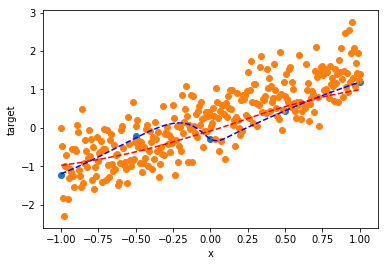

In [12]:
# === YOUR CODE HERE ===
plt.figure()
plt.xlabel('x')
plt.ylabel('target')
plt.scatter(train[0], train[1])
plt.scatter(test[0], test[1])
s = np.linspace(-1, 1, 200).reshape(1, 200).T
original_y = original_net.FeedForward(s)
plt.plot(s, original_y, 'b--')
dropout_y = dropout_net.FeedForward(s)
plt.plot(s, dropout_y, 'r--')
plt.show()


## (g) Average performance over 10 datasets

In [13]:
# === YOUR CODE HERE ===
average_original_cost = 0
average_dropout_cost = 0
for i in range(10):
    original_net = RobustNetwork(cost='MSE')
    input_layer = Network.Layer(n_nodes=1, act='None')
    hidden_layer = Network.Layer(n_nodes=10, act='arctan')
    output_layer = Network.Layer(n_nodes=1, act='identity')
    original_net.AddLayer(input_layer)
    original_net.AddLayer(hidden_layer)
    original_net.AddLayer(output_layer)

    dropout_net = copy.deepcopy(original_net)

    train, test = GenerateDatasets(5)
    original_net.SGD(train[0], train[1], lrate=1., epochs=5000, batch_size=5)
    dropout_net.SGD(train[0], train[1], lrate=1., epochs=5000, batch_size=5, dropout=0.2)
    original_test_cost = original_net.Evaluate(test[0], test[1])
    dropout_test_cost = dropout_net.Evaluate(test[0], test[1])
    average_original_cost += original_test_cost
    average_dropout_cost += dropout_test_cost
    
average_original_cost /= 10
average_dropout_cost /= 10
print("average_orignal_cost = " + str(average_original_cost))
print("average_dropout_cost = " + str(average_dropout_cost))
    


average_orignal_cost = 0.42125990885508857
average_dropout_cost = 0.3390899522585909


Dropout is preferred because it has lower average test cost over 10 test sets

# Q3: Weight Decay

## (a) Implement weight decay in BackProp (see code above)

## (b) Average performance over 10 datasets

In [14]:
# === YOUR CODE HERE ===
# === YOUR CODE HERE ===
average_original_cost = 0
average_decay_cost = 0
for i in range(10):
    original_net = RobustNetwork(cost='MSE')
    input_layer = Network.Layer(n_nodes=1, act='None')
    hidden_layer = Network.Layer(n_nodes=10, act='arctan')
    output_layer = Network.Layer(n_nodes=1, act='identity')
    original_net.AddLayer(input_layer)
    original_net.AddLayer(hidden_layer)
    original_net.AddLayer(output_layer)

    decay_net = copy.deepcopy(original_net)

    train, test = GenerateDatasets(5)
    original_net.SGD(train[0], train[1], lrate=1., epochs=5000, batch_size=5)
    decay_net.SGD(train[0], train[1], lrate=1., epochs=5000, batch_size=5, decay=0.0004)
    original_test_cost = original_net.Evaluate(test[0], test[1])
    decay_test_cost = decay_net.Evaluate(test[0], test[1])
    average_original_cost += original_test_cost
    average_decay_cost += decay_test_cost
    
average_original_cost /= 10
average_decay_cost /= 10
print("average_orignal_cost = " + str(average_original_cost))
print("average_decay_cost = " + str(average_decay_cost))
    


average_orignal_cost = 0.5069187858589623
average_decay_cost = 0.4818192111723148


Decay is preferred because it has lower average test cost over 10 test sets

# Q4: Classifier Networks

## Create an interesting dataset

In [15]:
def ClassPlot(x, y):
    # FeedForward
    yc = Network.OneHot(y)
    colour_options = ['y', 'b', 'r', 'g', 'k']
    cidx = np.argmax(yc, axis=1)
    colours = [colour_options[k] for k in cidx]
    plt.scatter(x[:,0],x[:,1], color=colours, marker='.')
    plt.axis('equal');

def GaussianCluster(mu, sa, N, theta=0.):
    theta_rad = theta/180*np.pi
    c, s = np.cos(theta_rad), np.sin(theta_rad)
    R = np.array([[c,-s],[s,c]])
    M = R @ np.diag(sa) @ R.T
    y = np.random.multivariate_normal(mu, M, N)
    return y

def CreateDataset(params):
    '''
        train, test = CreateDataset(params)
        
        Creates a dataset using a bunch of Gaussian clouds.
        
        Inputs:
          params is a list of 5-tuples. Each tuple (or list)
             describes a 2-D Gaussian cloud:
             1) the mean
             2) standard deviation along x and y directions
             3) rotation of cloud (degrees counter-clockwise)
             4) class index
             5) number of points
             
        Outputs:
          train is a list containing 2 arrays
             - the first array contains the training inputs,
               one per row
             - the second array contains the corresponding classes
          test has the same structure as train, but with
               half the number of samples
    '''
    train_inputs = []
    train_outputs = []
    test_inputs = []
    test_outputs = []
    all_c = [p[3] for p in params]
    n_classes = np.max(all_c)
    for p in params:
        xx = GaussianCluster(p[0], p[1], p[4], theta=p[2])
        yy = np.zeros((p[4], n_classes+1))
        yy[:,p[3]] = 1.
        train_inputs.append(xx)
        train_outputs.append(yy)
        xtest = GaussianCluster(p[0], p[1], int(p[4]/2), theta=p[2])
        ytest = np.zeros((int(p[4]/2), n_classes+1))
        ytest[:,p[3]] = 1.
        test_inputs.append(xtest)
        test_outputs.append(ytest)
    train = [np.vstack(train_inputs), np.vstack(train_outputs)]
    test = [np.vstack(test_inputs), np.vstack(test_outputs)]
    return train, test

# 0=y, 1=b, 2=r
params = [[[0.5, 0.5],   [0.025, 0.01],  -45, 0, 50],
          [[-0.5,-0.5],  [0.025, 0.01],  -45, 0, 50],
          [[-0.3,-0.35], [0.04,0.01],     10, 0, 80],
          [[0.6,0],      [0.01,0.01],      0, 0, 50],
          [[0.1,-0.04],  [0.1,0.005],     20, 0, 80],
          [[0.5,-0.5],   [0.02,0.01],     45, 1, 50],
          [[0,0.6],      [0.01,0.01],      0, 1, 50],
          [[-0.5,0.1],   [0.02,0.01],     30, 1, 80],
          [[-0.5,0.5],   [0.02,0.01],     45, 2, 50],
          [[0,-0.6],     [0.01,0.01],      0, 2, 50],
          [[0.2,0.3],    [0.01,0.004],     0, 2, 80],
          [[-0.2,0.37],  [0.02,0.005],   -30, 2, 50],
          [[0.25,-0.3],  [0.005,0.01],     0, 3, 60],
          [[-0.1,0.1],   [0.01,0.01],    -30, 3, 50]
         ]

In [16]:
train, test = CreateDataset(params)

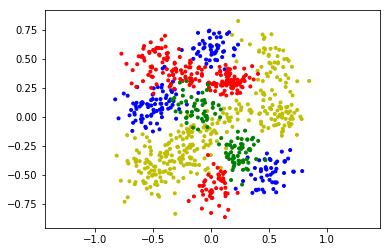

In [17]:
ClassPlot(train[0], train[1]);

## (a) Create and Evaluate a Neural Network

In [18]:
net = RobustNetwork('categorical-cross-entropy')
input_layer = Network.Layer(2)
hidden_layer1 = Network.Layer(6, 'arctan')
#hidden_layer2 = Network.Layer(3, 'arctan')
hidden_layer3 = Network.Layer(4, 'arctan')
output_layer = Network.Layer(4, 'softmax')
net.AddLayer(input_layer)
net.AddLayer(hidden_layer1)
#net.AddLayer(hidden_layer2)
net.AddLayer(hidden_layer3)
net.AddLayer(output_layer)
train, test = CreateDataset(params)
progress = net.SGD(train[0], train[1], epochs=400, lrate=0.5)

## (b) Evaluate Model

In [19]:
# === YOUR CODE HERE ===
y = net.FeedForward(test[0])
accuracy = Network.ClassificationAccuracy(y, test[1])
print("Test accuracy = " + str(accuracy))

Test accuracy = 0.9204819277108434


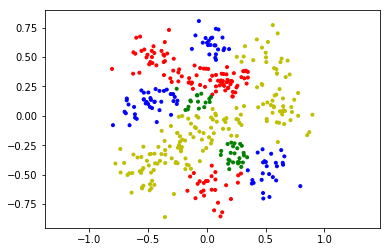

In [20]:
ClassPlot(test[0], y);

## (c) Crappy Network

In [21]:
# === YOUR CODE HERE ===
net = RobustNetwork('categorical-cross-entropy')
input_layer = Network.Layer(2)
hidden_layer1 = Network.Layer(1, 'ReLU')
output_layer = Network.Layer(4, 'softmax')
net.AddLayer(input_layer)
net.AddLayer(hidden_layer1)
#net.AddLayer(hidden_layer2)
#net.AddLayer(hidden_layer3)
net.AddLayer(output_layer)
train, test = CreateDataset(params)
progress = net.SGD(train[0], train[1], epochs=400, lrate=0.5)

In [22]:
# === YOUR CODE HERE ===
y = net.FeedForward(test[0])
accuracy = Network.ClassificationAccuracy(y, test[1])
print("Test accuracy is: " + str(accuracy))

Test accuracy is: 0.3710843373493976
